In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

Make graphs more readable in dark theme
(If you are not using jupyter notebook in dark theme don't run the cell below)

In [2]:
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

Load data into dataframes

In [3]:
confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovered_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [4]:
confirmed = pd.read_csv(confirmed_url, error_bad_lines=False)
deaths = pd.read_csv(deaths_url, error_bad_lines=False)
recovered = pd.read_csv(recovered_url, error_bad_lines=False)

Clean dataframes

In [5]:
confirmed.drop(['Lat','Long','Province/State'], axis = 1, inplace = True)
deaths.drop(['Lat','Long','Province/State'], axis = 1, inplace = True)
recovered.drop(['Lat','Long','Province/State'], axis = 1, inplace = True)

In [6]:
confirmed = confirmed.groupby(['Country/Region']).sum().reset_index()
deaths = deaths.groupby(['Country/Region']).sum().reset_index()
recovered = recovered.groupby(['Country/Region']).sum().reset_index()

In [7]:
# make dataframes less wide by turning date columns into rows
confirmed = pd.melt(confirmed, id_vars=['Country/Region'], var_name='Date', value_name='Cases')
deaths = pd.melt(deaths, id_vars=['Country/Region'], var_name='Date', value_name='Deaths')
recovered = pd.melt(recovered, id_vars=['Country/Region'], var_name='Date', value_name='Recovered')

In [8]:
confirmed['Date'] = pd.to_datetime(confirmed['Date'])
deaths['Date'] = pd.to_datetime(deaths['Date'])
recovered['Date'] = pd.to_datetime(recovered['Date'])

Create list of dateframes for each country with daily increase column for easier plotting

In [9]:
def create_country_list(df):
    dflist = []
    for i in range(188):
        newdf = df.groupby(['Date']).nth(i).reset_index()
        newdf['Daily Change'] = 0
        dflist.append(newdf)
    return dflist


confirmed_list = create_country_list(confirmed)
deaths_list = create_country_list(deaths)
recovered_list = create_country_list(recovered)

In [10]:
def create_daily_increase(dflist):
    for i in range(188):
        for j in range(len(confirmed.groupby(['Date']).nth(0).index)-1, 0, -1):  #the same length for all
            dflist[i].iloc[j, 3] = dflist[i].iloc[j, 2] - dflist[i].iloc[j-1, 2] #calculate daily increase
        #below changes all negative values to 0 and applies rolling average
        #this smooths the areas on the graph that dropped off because of re-adjusted totals
        if dflist[i].iloc[j, 3] < 0:
            dflist[i].iloc[j, 3] = 0
        dflist[i].iloc[:,3] = dflist[i].iloc[:,3].rolling(window=7).mean()
    return dflist

In [11]:
confirmed_list = create_daily_increase(confirmed_list)
recovered_list = create_daily_increase(recovered_list)
deaths_list = create_daily_increase(deaths_list)

Plot graphs

In [12]:
def create_plot(dflist):
    ax.figure.set_size_inches(15,8)
    
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
    ax.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
    formatter = ticker.FuncFormatter(lambda y, _: '{:.16g}'.format(y))
    ax.get_xaxis().set_major_formatter(formatter)
    ax.get_yaxis().set_major_formatter(formatter)
    ax.get_yaxis().get_major_formatter().labelOnlyBase = False

    for i in range(len(dflist)):
        if i == 83:  # Ireland
            ax.plot(dflist[i].iloc[:,2], dflist[i].iloc[:,3], label = 'Ireland',
                    color = 'green', marker = 'o', markevery = 3, zorder = 188, alpha = 0.5,)
        elif i == 36:  # China
            ax.plot(dflist[i].iloc[:,2], dflist[i].iloc[:,3], label = 'China',
                    color = 'red', marker = 'o', markevery = 3, zorder = 187, alpha = 0.5)
        elif i == 174:  # US
            ax.plot(dflist[i].iloc[:,2], dflist[i].iloc[:,3], label = 'US',
                    color = 'blue', marker = 'o', markevery = 3, zorder = 186, alpha = 0.5)
        elif i == 178: # UK
            ax.plot(dflist[i].iloc[:,2], dflist[i].iloc[:,3], label = 'UK',
                    color = 'brown', marker = 'o', markevery = 3, zorder = 185, alpha = 0.5)
        elif i == 85: # Italy
            ax.plot(dflist[i].iloc[:,2], dflist[i].iloc[:,3], label = 'Italy',
                    color = 'cyan', marker = 'o', markevery = 3, zorder = 184, alpha = 0.5)
        elif i == 91: # South Korea
            ax.plot(dflist[i].iloc[:,2], dflist[i].iloc[:,3], label = 'S. Korea',
                    color = 'orange', marker = 'o', markevery = 3, zorder = 183, alpha = 0.5)
        elif i == 87: # Japan
            ax.plot(dflist[i].iloc[:,2], dflist[i].iloc[:,3], label = 'Japan',
                    color = 'purple', marker = 'o', markevery = 3, zorder = 182, alpha = 0.5)
        elif i == 158: # Spain
            ax.plot(dflist[i].iloc[:,2], dflist[i].iloc[:,3], label = 'Spain',
                    color = '#E1AD01', marker = 'o', markevery = 3, zorder = 181, alpha = 0.5) # mustard
        elif i == 66: # Germany
            ax.plot(dflist[i].iloc[:,2], dflist[i].iloc[:,3], label = 'Germany',
                    color = 'pink', marker = 'o', markevery = 3, zorder = 180, alpha = 0.9)
        else:
            ax.plot(dflist[i].iloc[:,2], dflist[i].iloc[:,3], color = '#D3D3D3', alpha = 0.3) # light grey

    plt.grid(True, color = '#E8E8E8') # very light grey

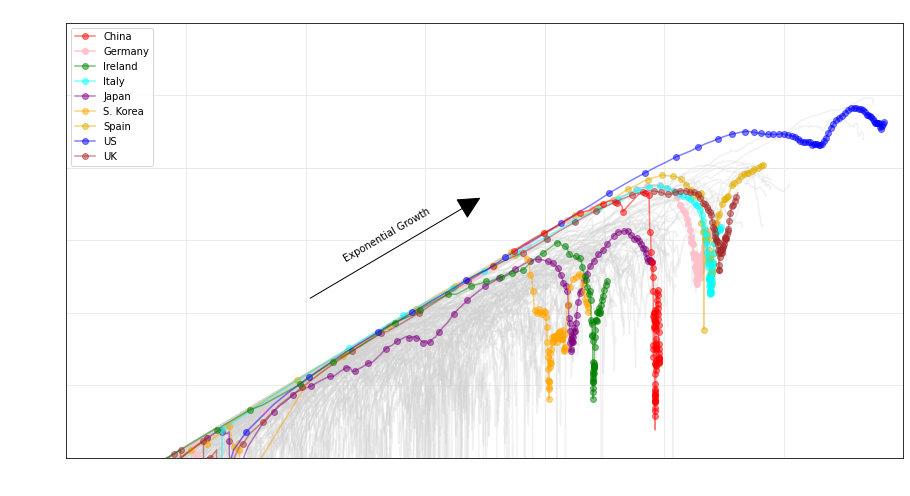

In [13]:
ax = plt.subplot()
plt.ylabel('New Daily Cases (log) by Time')
plt.xlabel('Total Cases (log) by Time')
plt.title('Change in Daily Cases vs Total Cases', color = 'white')

create_plot(confirmed_list)
ax.set_ylim(1, 1000000)
ax.set_xlim(1, 10000000)
ax.set_yticks([10, 100, 1000, 10000, 10000, 100000])
ax.set_xticks([10, 100, 1000, 10000, 10000, 100000, 1000000])
arrow_properties = dict(arrowstyle='-|>', mutation_scale=50, color='black')
plt.annotate("    ", xy=(3000,4000), xytext=(80,120), arrowprops=arrow_properties)
plt.annotate("Exponential Growth", xy=(200,500), rotation=30)
ax.legend()
plt.show()

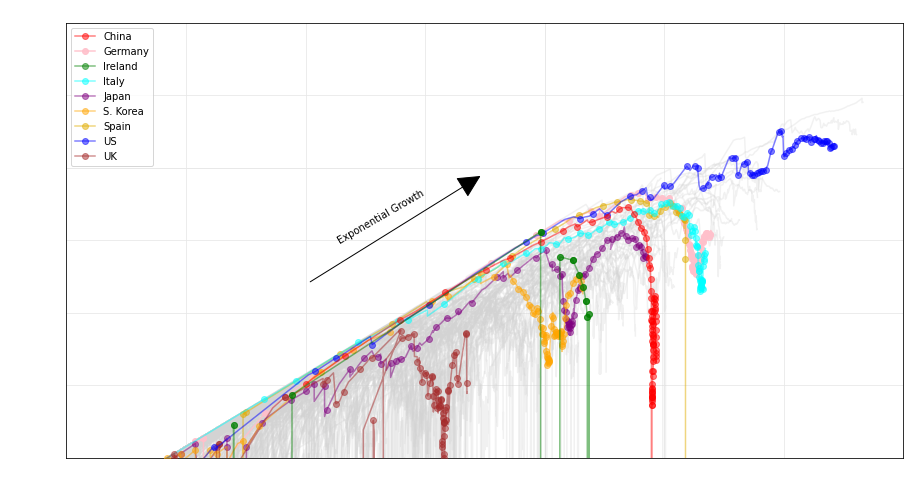

In [14]:
ax = plt.subplot()
plt.ylabel('New Daily Recoveries (log) by Time')
plt.xlabel('Total Recoveries (log) by Time')
plt.title('Change in Daily Recoveries vs Total Recoveries', color = 'white')

create_plot(recovered_list)
ax.set_ylim(1, 1000000)
ax.set_xlim(1, 10000000)
ax.set_yticks([10, 100, 1000, 10000, 10000, 100000])
ax.set_xticks([10, 100, 1000, 10000, 10000, 100000, 1000000])
arrow_properties = dict(arrowstyle='-|>', mutation_scale=50, color='black')
plt.annotate("    ", xy=(3000,8000), xytext=(80,200), arrowprops=arrow_properties)
plt.annotate("Exponential Growth", xy=(180,900), rotation=30)
ax.legend()
plt.show()

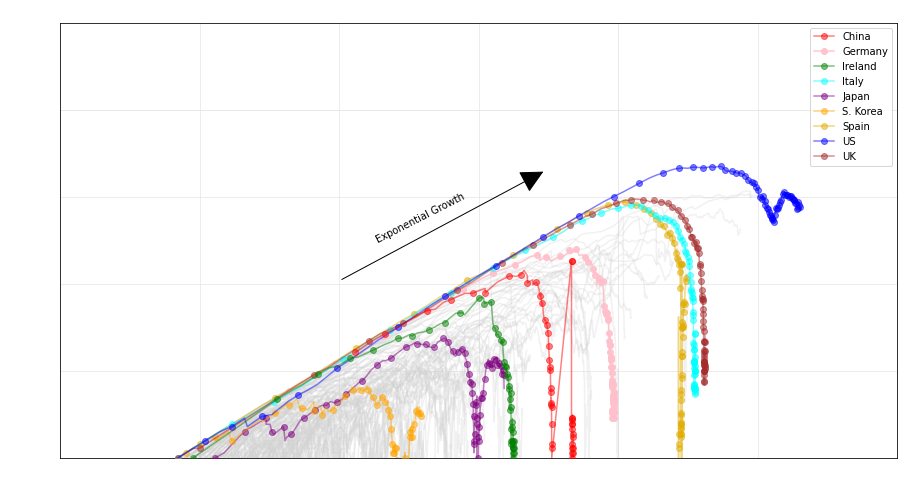

In [15]:
ax = plt.subplot()
plt.ylabel('New Daily Deaths (log) by Time')
plt.xlabel('Total Deaths (log) by Time')
plt.title('Change in Daily Deaths vs Total Deaths', color = 'white')

create_plot(deaths_list)
ax.set_ylim(1, 100000)
ax.set_xlim(1, 1000000)
ax.set_yticks([10, 100, 1000, 10000, 10000])
ax.set_xticks([10, 100, 1000, 10000, 10000, 100000])
arrow_properties = dict(arrowstyle='-|>', mutation_scale=50, color='black')
plt.annotate("    ", xy=(3000,2000), xytext=(80,90), arrowprops=arrow_properties)
plt.annotate("Exponential Growth", xy=(180,300), rotation=27)
ax.legend()
plt.show()